# YOLOv8n Vessel Detection Model Evaluation (training predictions)

Generates predictions from the training set to evaluates the 3 models trained on the generated datasets single-pol-2ch (baseline), single-pol-3ch and dula-pol-3ch.

## 1. Setup

In [1]:
# Better error messages in notebooks
%load_ext autoreload
%autoreload 2

In [2]:
# Set up data paths
from pathlib import Path
import sys

# Get to project root from notebook location
PROJECT_ROOT = Path.cwd().parent
# Add "src" to Python's module search path sys.path
sys.path.append(str(PROJECT_ROOT / "src"))
sys.path.append("/home/peterm/UWA/CITS5014/SARFish/working")

# Define project paths
DATA_DIR = PROJECT_ROOT / "data"
RUNS_DIR = PROJECT_ROOT / "runs"

print(f"PROJECT_ROOT: {PROJECT_ROOT}")
print(f"DATA_DIR:     {DATA_DIR}")
print(f"RUNS_DIR:     {RUNS_DIR}")

PROJECT_ROOT: /home/peterm/UWA/CITS5014/SARFish/modelling
DATA_DIR:     /home/peterm/UWA/CITS5014/SARFish/modelling/data
RUNS_DIR:     /home/peterm/UWA/CITS5014/SARFish/modelling/runs


In [3]:
import yaml
from ultralytics import YOLO
from compare_inference_results import create_sar_prediction_comparison

## 2. Vessel detection evaluation on models trained on the three generated datasets

### 2.1 **single-pol-2ch**

**Define model and evaluation paths:**

In [4]:
# single-pol-2ch: '/mnt/h/SARFish/Generated/SLC/train/crops_png_alt/images'  (20250910_2352_701491)

In [5]:
# Define the path to the single-pol-2ch model
results_path = RUNS_DIR / 'png_runs' / 'png_aug_bal' / '20250910_2352_701491'

# Define the path for evaluation results 
eval_path = Path(results_path / 'evaluation' / 'train')
eval_path.mkdir(parents=True, exist_ok=True)
print(eval_path)

/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_bal/20250910_2352_701491/evaluation/train


In [6]:
# Define the path to the best model
model_path_sp2 = results_path / 'weights' / 'best.pt'
print(f"model_path_sp2: {model_path_sp2}" )

model_path_sp2: /home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_bal/20250910_2352_701491/weights/best.pt


**Define the data paths:**

In [7]:
# Create data configuration used by both single and dual-phase training
import yaml

data_config = {
    'path':   '/home/peterm/UWA/CITS5014/SARFish/modelling/data',
    'train':  'train_hvrt_msc_bal_alt_new',
    'val':    'val_alt',
    'test':   'test_alt',
    'nc': 2,
    'names':  ['is_vessel', 'is_fishing']
}

# Save to configs directory
yaml_path = str(eval_path / 'png_aug_alt.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(data_config, f)

**Make predictions:**

In [8]:
# Load the model
model = YOLO(model_path_sp2)

In [9]:
# Run validation with Ultralytics defaults
train_results = model.val(
    data=yaml_path,
    project=eval_path,
    split='train',
    conf=0.01,       # minimum confidence threshold for detections
    save_txt=True,    # saves detection results one file per image
    iou=0.65,          # Default IoU threshold for NMS
    plots=False,
    verbose=True
)

Ultralytics 8.3.152 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX 2000 Ada Generation Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 77.3±8.4 MB/s, size: 20.3 KB)


val: Scanning /home/peterm/UWA/CITS5014/SARFish/modelling/data/train_hvrt_msc_bal_alt_new/labels.cache... 7595 images, 0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 475/475 [01:5

                   all       7595       7805       0.67      0.665      0.693      0.313
             is_vessel       3772       3835      0.735      0.716       0.79      0.385
            is_fishing       3889       3970      0.604      0.615      0.596      0.241
Speed: 0.3ms preprocess, 3.9ms inference, 0.0ms loss, 1.4ms postprocess per image


### 2.2 **single-pol-3ch**

**Define model and evaluation paths:**

In [10]:
# single-pol-3ch: '/mnt/h/SARFish/Generated/SLC/train/crops_png_ext/images'  (20250924_1934_33064)

In [11]:
# Define the path to the single-pol-3ch model
results_path = RUNS_DIR / 'png_runs' / 'png_aug_bal' / '20250924_1934_33064'

# Define the path for evaluation results 
eval_path = Path(results_path / 'evaluation' / 'train')
eval_path.mkdir(parents=True, exist_ok=True)
print(eval_path)

/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_bal/20250924_1934_33064/evaluation/train


In [12]:
# Define the path to the best model
model_path_sp3 = results_path / 'weights' / 'best.pt'
print(f"model_path_sp3: {model_path_sp3}" )

model_path_sp3: /home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_bal/20250924_1934_33064/weights/best.pt


**Define the data paths:**

In [13]:
# Create data configuration used by both single and dual-phase training
import yaml

data_config = {
    'path':   '/home/peterm/UWA/CITS5014/SARFish/modelling/data',
    'train':  'train_hvrt_msc_bal_new_ext',
    'val':    'val_ext',
    'test':   'test_ext',
    'nc': 2,
    'names':  ['is_vessel', 'is_fishing']
}

# Save to configs directory
yaml_path = str(eval_path / 'png_aug_ext.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(data_config, f)

**Make predictions:**

In [14]:
# Load the model
model = YOLO(model_path_sp3)

In [15]:
# Run validation with Ultralytics defaults
test_results = model.val(
    data=yaml_path,
    project=eval_path,
    split='train',
    conf=0.01,       # minimum confidence threshold for detections
    save_txt=True,    # saves detection results one file per image
    iou=0.65,          # Default IoU threshold for NMS
    plots=False,
    verbose=True
)

Ultralytics 8.3.152 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX 2000 Ada Generation Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 30.1±14.2 MB/s, size: 26.4 KB)


val: Scanning /home/peterm/UWA/CITS5014/SARFish/modelling/data/train_hvrt_msc_bal_new_ext/labels.cache... 7595 images, 0
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 475/475 [02:0

                   all       7595       7805      0.752      0.719      0.774      0.385
             is_vessel       3772       3835      0.828      0.713      0.829      0.443
            is_fishing       3889       3970      0.676      0.726      0.719      0.327
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 1.5ms postprocess per image


### 2.3 **dual-pol-3ch**

**Define model and evaluation paths:**

In [16]:
# dual-pol-3ch = '/mnt/h/SARFish/Generated/SLC/val/crops_png_dual/images'  (20250915_1358_30042)

In [17]:
# Define the path to the dual-pol-3ch model
results_path = RUNS_DIR / 'png_runs' / 'png_aug_dual' / '20250915_1358_30042'

# Define the path for evaluation results 
eval_path = Path(results_path / 'evaluation' / 'train')
eval_path.mkdir(parents=True, exist_ok=True)
print(eval_path)

/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_dual/20250915_1358_30042/evaluation/train


In [18]:
# Define the path to the best model
model_path_dp3 = results_path / 'weights' / 'best.pt'
print(model_path_dp3)

/home/peterm/UWA/CITS5014/SARFish/modelling/runs/png_runs/png_aug_dual/20250915_1358_30042/weights/best.pt


**Define the data paths:**

In [19]:
# Create data configuration used by both single and dual-phase training
import yaml

data_config = {
    'path':   '/home/peterm/UWA/CITS5014/SARFish/modelling/data',
    'train':  'train_hvrt_msc_bal_dual/images',
    'val':    'val_dual',
    'test':   'test_dual',
    'nc': 2,
    'names':  ['is_vessel', 'is_fishing']
}

# Save to configs directory
yaml_path = str(eval_path / 'png_aug_dual.yaml')
with open(yaml_path, 'w') as f:
    yaml.dump(data_config, f)

**Make predictions:**

In [20]:
# Load the model
model = YOLO(model_path_dp3)

In [21]:
# Run validation with Ultralytics defaults
train_results = model.val(
    data=yaml_path,
    project=eval_path,
    split='train',
    conf=0.01,       # minimum confidence threshold for detections
    save_txt=True,    # saves detection results one file per image
    iou=0.65,          # Default IoU threshold for NMS
    plots=False,
    verbose=True
)

Ultralytics 8.3.152 🚀 Python-3.10.12 torch-2.6.0+cu124 CUDA:0 (NVIDIA RTX 2000 Ada Generation Laptop GPU, 8188MiB)
Model summary (fused): 72 layers, 3,006,038 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 83.4±18.4 MB/s, size: 23.1 KB)


val: Scanning /home/peterm/UWA/CITS5014/SARFish/modelling/data/train_hvrt_msc_bal_dual/labels.cache... 7593 images, 0 ba
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 475/475 [02:0


                   all       7593       7803      0.775      0.739      0.801      0.396
             is_vessel       3768       3849      0.824       0.75      0.847      0.447
            is_fishing       3887       3954      0.725      0.727      0.755      0.346
Speed: 0.3ms preprocess, 3.7ms inference, 0.0ms loss, 1.7ms postprocess per image


## 3. Visualisation: predictions vs ground truth

Using best model (dp3) to compare predictions (bottom row) against ground truth (top row)

In [22]:
train_images_dir = '/home/peterm/UWA/CITS5014/SARFish/modelling/data/train_hvrt_msc_bal_dual/images'
train_labels_dir = '/home/peterm/UWA/CITS5014/SARFish/modelling/data/train_hvrt_msc_bal_dual/labels'

Found 7593 images. Displaying 5 randomly selected images:



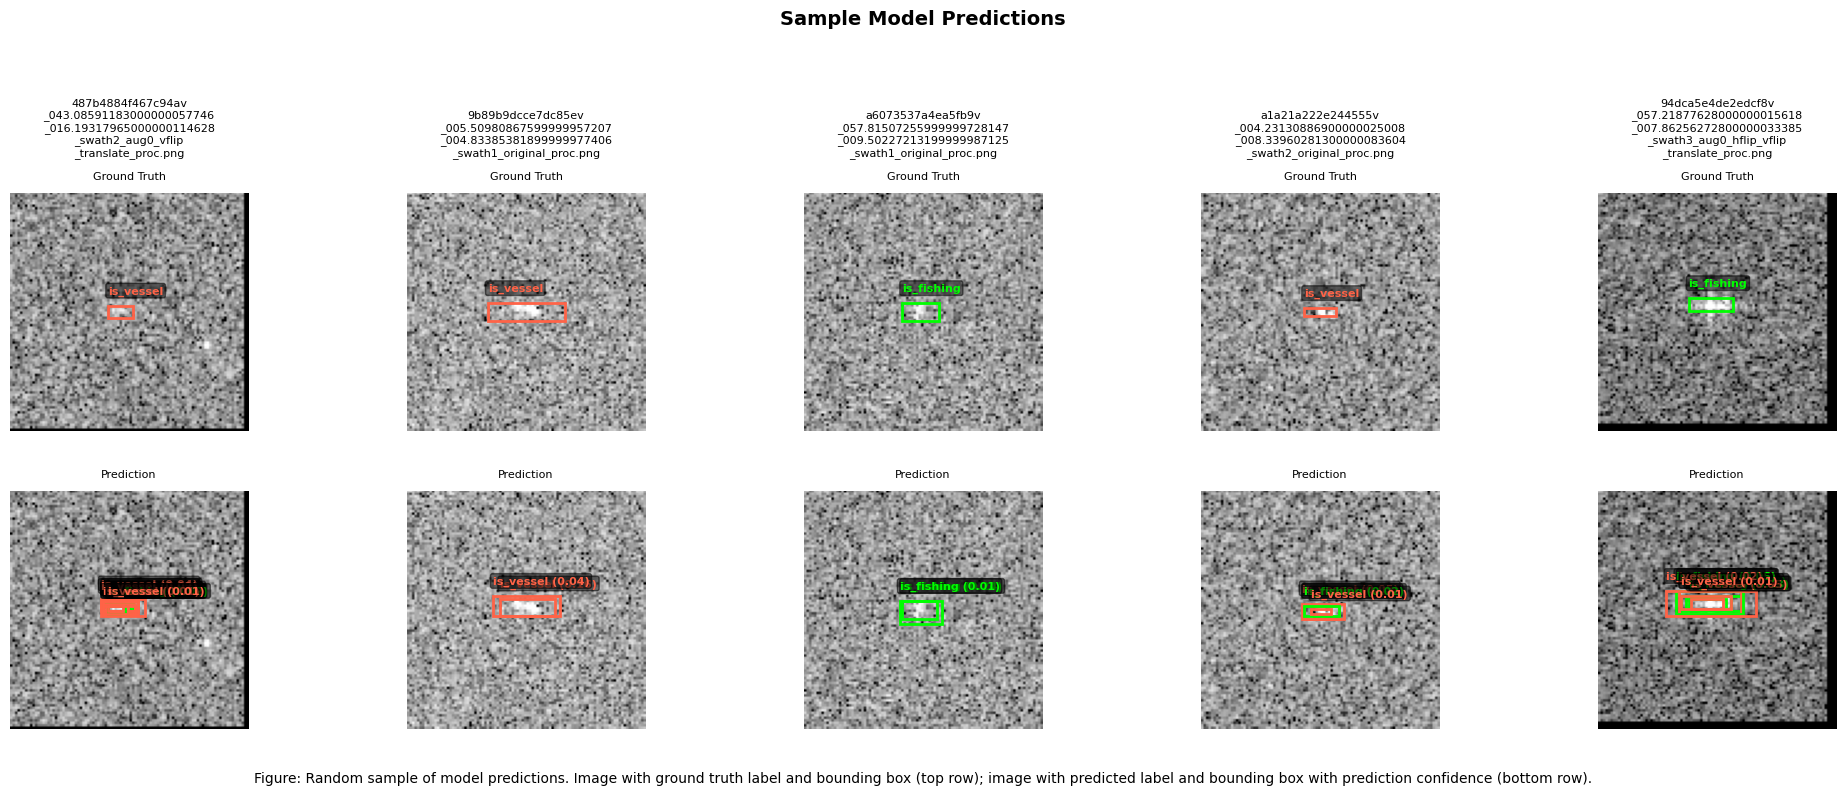

In [23]:
model = YOLO(model_path_dp3)

create_sar_prediction_comparison(model, train_images_dir,
                                 labels_path=train_labels_dir,
                                 conf=0.01,
                                 iou=0.65,
                                 verbose=False,
                                 num_images=5,
                                 save_path=None
)